In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [3]:
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

/home/ashwin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [5]:
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=8,6

In [6]:
def plot_histograms(df,variables,n_rows,n_cols):
    fig=plt.figure(figsize=(16,12))
    for i,var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df['var_name'].hist(bins=10,ax=ax)
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels([],visible=False)
        ax.set_yticklabels([],visible=False)
    fig.tight_layout()
    plt.show()

In [7]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    plt.show(facet)

In [8]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    plt.show(facet)

In [17]:
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    plt.show(cmap)

In [10]:
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [67]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    plt.show(tree)

In [12]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [13]:
train=pd.read_csv('/home/ashwin/Downloads/train.csv')
test=pd.read_csv('/home/ashwin/Downloads/test.csv')
full=train.append(test,ignore_index=True)
titanic=full[:891]
del train,test
print('Datasets','full',full.shape,'titanic',titanic.shape)

('Datasets', 'full', (1309, 12), 'titanic', (891, 12))


In [36]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [15]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


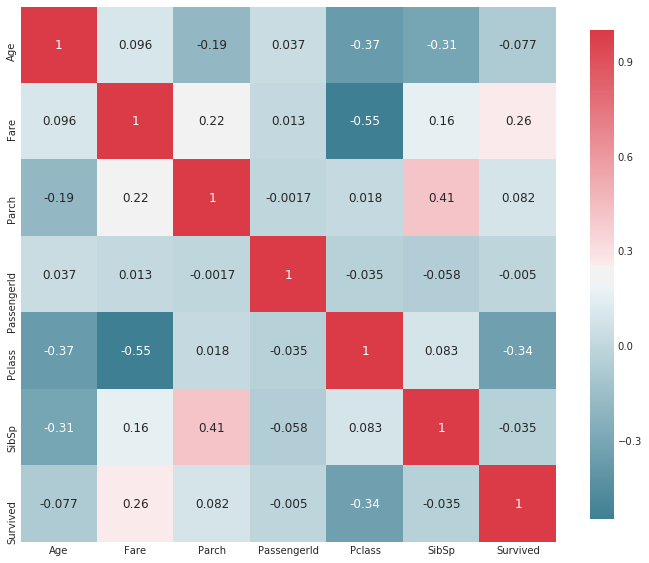

In [18]:
plot_correlation_map(titanic)

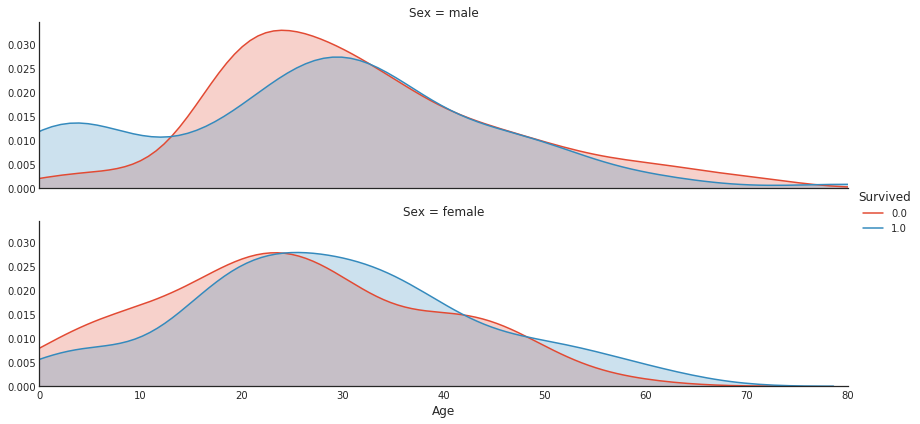

In [37]:
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

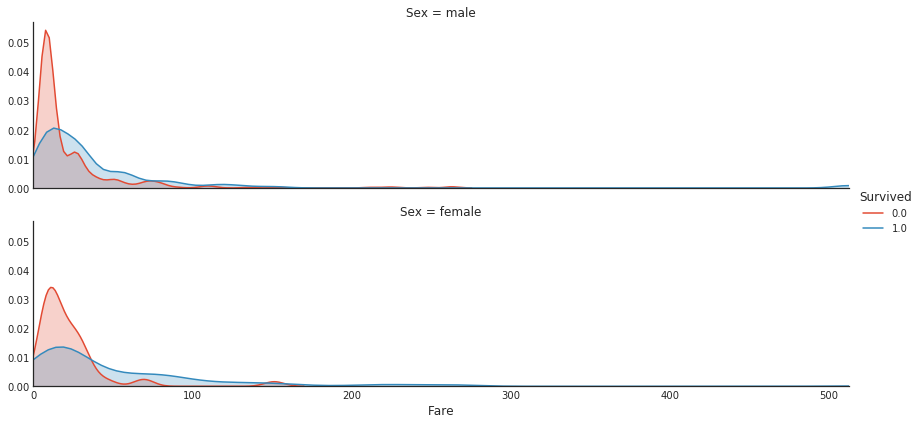

In [21]:
plot_distribution( titanic , var = 'Fare' , target = 'Survived' , row = 'Sex' )

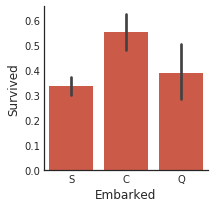

In [22]:
plot_categories(titanic,cat='Embarked',target='Survived')

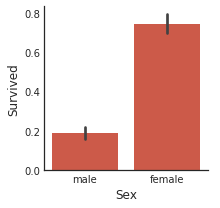

In [23]:
plot_categories(titanic,cat='Sex',target='Survived')

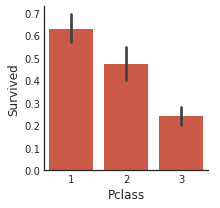

In [24]:
plot_categories(titanic,cat='Pclass',target='Survived')

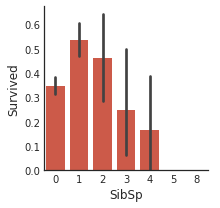

In [25]:
plot_categories(titanic,cat='SibSp',target='Survived')

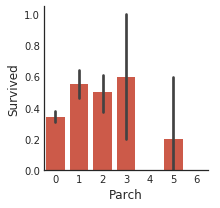

In [26]:
plot_categories(titanic,cat='Parch',target='Survived')

In [30]:
sex=pd.Series(np.where(full.Sex=='male',1,0),name='Sex')
embarked=pd.get_dummies(full.Embarked,prefix='Embarked')
pclass=pd.get_dummies(full.Pclass,prefix='Pclass')

In [31]:
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [32]:
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [33]:
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [34]:
imputed=pd.DataFrame()
imputed['Age']=full.Age.fillna(full.Age.mean())
imputed['Fare']=full.Fare.fillna(full.Fare.mean())
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [40]:
title=pd.DataFrame()
title['Title']=full['Name'].map(lambda name:name.split(',')[1].split('.')
                                 [0].strip())
Title_Dictonary={
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
}
title['Title']=title.Title.map(Title_Dictonary)
title=pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [46]:
cabin=pd.DataFrame()
cabin['Cabin']=full.Cabin.fillna('U')
cabin['Cabin']=cabin['Cabin'].map(lambda c:c[0])
cabin=pd.get_dummies(cabin['Cabin'],prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [49]:
def claenTicket(ticket):
    ticket=ticket.replace('.','')
    ticket=ticket.replace('/','')
    ticket=ticket.split()
    ticket=map(lambda  t:t.strip(),ticket)
    ticket=list(filter(lambda t:not t.isdigit(),ticket))
    if(len(ticket)>0):
        return ticket[0]
    else:
        return 'xxx'
    
ticket=pd.DataFrame()
ticket['Ticket']=full['Ticket'].map(claenTicket)
ticket=pd.get_dummies(ticket['Ticket'],prefix='Ticket')
ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_xxx
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
family=pd.DataFrame()
family['FamilySize']=full['Parch']+full['SibSp']+1
family['Family_Single']=family['FamilySize'].map(lambda s:1 if s==1 else 0)
family['Family_Small']=family['FamilySize'].map(lambda s:1 if 2<=s <=4 else 0)
family['Family_Large']=family['FamilySize'].map(lambda s:1 if 5<=s else 0)
family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [60]:
full_x=pd.concat([imputed,cabin,embarked,sex,full.Survived],axis=1)
full_x.head()

,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex,Survived
0,22.0,7.2500,0,0,0,0,0,0,0,0,1,0,0,1,1,0.0
1,38.0,71.2833,0,0,1,0,0,0,0,0,0,1,0,0,0,1.0
2,26.0,7.9250,0,0,0,0,0,0,0,0,1,0,0,1,0,1.0
3,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0
4,35.0,8.0500,0,0,0,0,0,0,0,0,1,0,0,1,1,0.0


In [65]:
train_valid_X = full_x[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_x[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_x.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

((1309, 16), (623, 16), (268, 16), (623,), (268,), (418, 16))


1.0


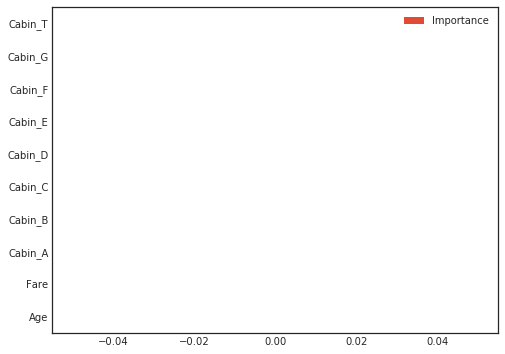

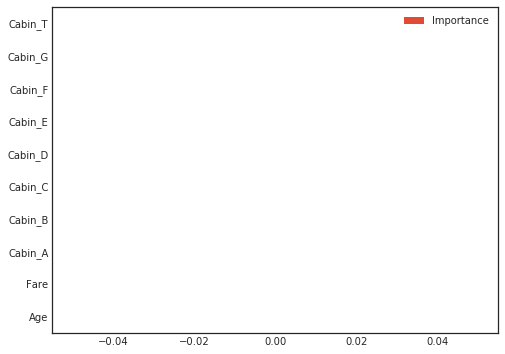

In [68]:
plot_variable_importance(train_X,train_y)

In [71]:
model = RandomForestClassifier(n_estimators=100)
model.fit( train_X , train_y )
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(1.0, 1.0)


In [73]:
rfecv = RFECV( estimator = model , step = 1 , cv = StratifiedKFold( train_y , 2 ) , scoring = 'accuracy' )
rfecv.fit( train_X , train_y )

RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[ 1.  1. ...,  0.  0.], n_folds=2, shuffle=False, random_state=None),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [1]:
str='excel'
str[:2]

'ex'